# **Tame Your Python**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [3]:
# Load data
dataset = fetch_lfw_people(min_faces_per_person=100)
 
N, H, W = dataset.images.shape
X = dataset.data
y = dataset.target
target_names = dataset.target_names

In [4]:
print(target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [5]:
print(dataset.images.shape)
print(dataset.data.shape)
print(dataset.target.shape)

(1140, 62, 47)
(1140, 2914)
(1140,)


In [6]:
print(H*W)

2914


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [0]:
from sklearn.random_projection import SparseRandomProjection
n_components = 80
decomposer = SparseRandomProjection(n_components=n_components).fit(X_train)

X_train_d = decomposer.transform(X_train)
X_test_d = decomposer.transform(X_test)

In [9]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True)
model.fit(X_train_d, y_train)

Iteration 1, loss = inf
Validation score: 0.097087
Iteration 2, loss = inf
Validation score: 0.504854
Iteration 3, loss = inf
Validation score: 0.504854
Iteration 4, loss = inf
Validation score: 0.165049
Iteration 5, loss = 118.19313539
Validation score: 0.495146
Iteration 6, loss = 102.59010305
Validation score: 0.533981
Iteration 7, loss = 72.29924681
Validation score: 0.359223
Iteration 8, loss = 48.93886450
Validation score: 0.563107
Iteration 9, loss = 57.32214557
Validation score: 0.601942
Iteration 10, loss = 37.00643840
Validation score: 0.524272
Iteration 11, loss = 27.63759893
Validation score: 0.533981
Iteration 12, loss = 21.40103703
Validation score: 0.631068
Iteration 13, loss = 17.76157356
Validation score: 0.640777
Iteration 14, loss = 18.60423118
Validation score: 0.679612
Iteration 15, loss = 15.31994439
Validation score: 0.660194
Iteration 16, loss = 14.56982681
Validation score: 0.631068
Iteration 17, loss = 13.33366791
Validation score: 0.679612
Iteration 18, loss 

MLPClassifier(activation='relu', alpha=0.0001, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1024,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [0]:
y_pred = model.predict(X_test_d)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.56      0.61      0.58        23
  Donald Rumsfeld       0.75      0.38      0.50        16
    George W Bush       0.78      0.79      0.79        53
Gerhard Schroeder       0.43      0.69      0.53        13
       Tony Blair       0.67      0.44      0.53         9

         accuracy                           0.66       114
        macro avg       0.64      0.58      0.59       114
     weighted avg       0.68      0.66      0.66       114



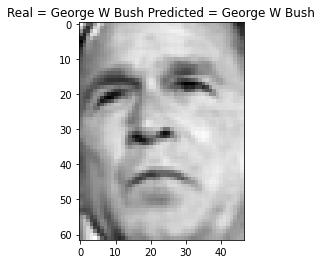

In [12]:
idx = np.random.randint(0,len(y_pred))
plt.figure()
plt.imshow(X_test[idx].reshape((H,W)), cmap = 'gray')
plt.title("Real = " + str(target_names[y_test[idx]]) + " Predicted = " + str(target_names[y_pred[idx]]))
plt.show()